In [1]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline


In [2]:
df = pd.read_csv("11-iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


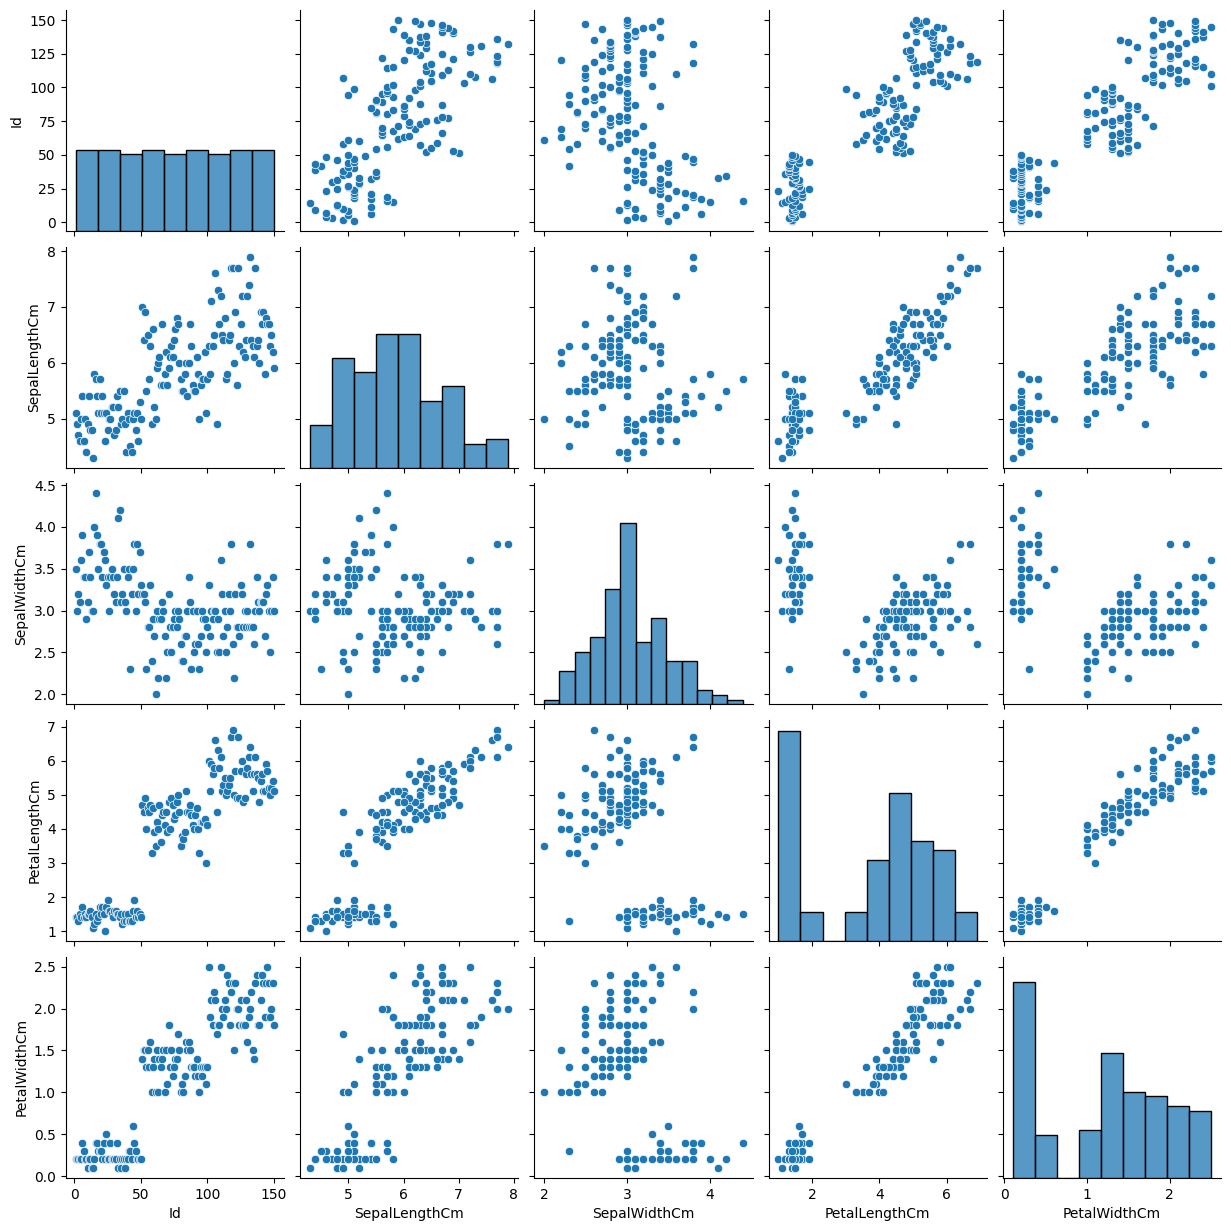

In [8]:
sns.pairplot(df)

In [13]:
df.drop("Id", axis=1, inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [17]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [19]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [21]:
#gaussian bayes te scaler kullanmak gerekli olabilir.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()

In [26]:
gnb.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [27]:
y_pred = gnb.predict(X_test_scaled)

In [30]:
print("confusion_matrix \n:" , confusion_matrix(y_pred, y_test))
print("accuracy score :" , accuracy_score(y_pred, y_test))
print("classification report :" , classification_report(y_pred, y_test))

confusion_matrix 
: [[15  0  0]
 [ 0 16  0]
 [ 0  0 14]]
accuracy score : 1.0
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [32]:
from sklearn.metrics import mean_absolute_error, r2_score

Mean absolute error 0.14147310493831444
R2 Score 0.9487040206764952


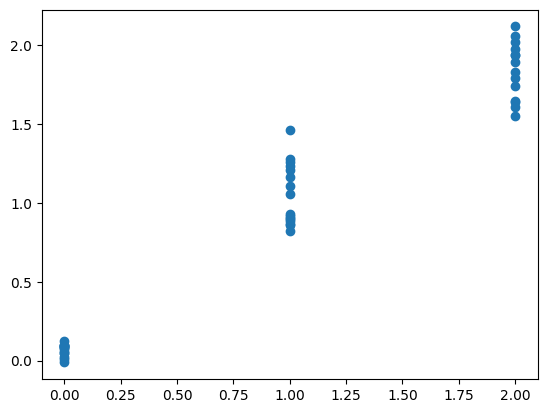

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled, y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 0.0
R2 Score 1.0


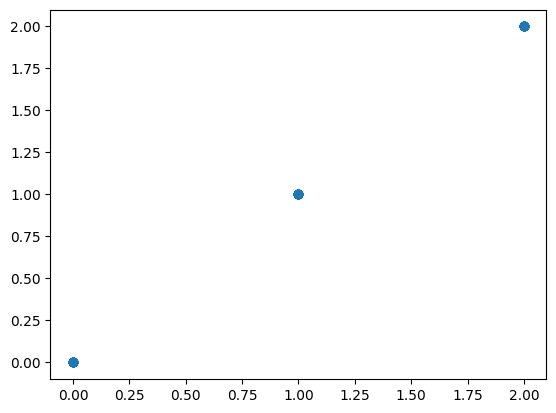

In [37]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

Mean absolute error 0.1550168653722902
R2 Score 0.9376753827694463


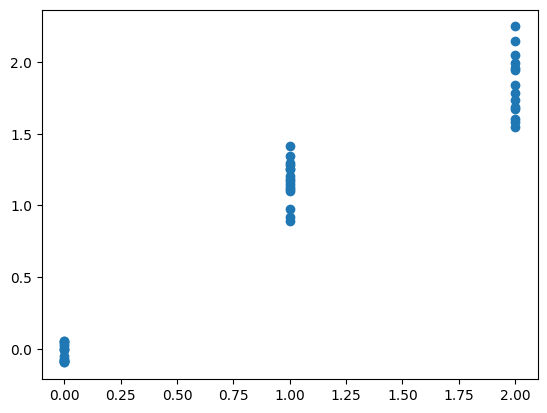

In [38]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()
